In [1]:
!pip install pdf2image

In [2]:
from pdf2image import convert_from_path # Used to convert pdf to image
import cv2
import numpy as np
from PIL import Image, ImageOps
from IPython.display import display

In [3]:
def process_and_display_image(pdf_path, target_size=(800, 600),save_path='processed_image.jpeg'):
    
    # Convert PDF to image
    images = convert_from_path(pdf_path)

    # Since there is only 1 image in the pdf
    image = images[0]

    # Automatically rotates the image if needed
    image = ImageOps.exif_transpose(image)

    # Resize image to target size
    image.thumbnail(target_size, Image.Resampling.LANCZOS)

    # Convert to numpy array for any advanced processing
    image_np = np.array(image)

    # Converting to grayscale to reduce variations
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

    # Convert back to PIL image to display in Jupyter
    image_processed = Image.fromarray(image_np)

    # Display the processed image
    display(image_processed)

    # Save the processed image to a file
    image_processed.save(save_path, 'JPEG')
    print(f"Image saved as {save_path}")

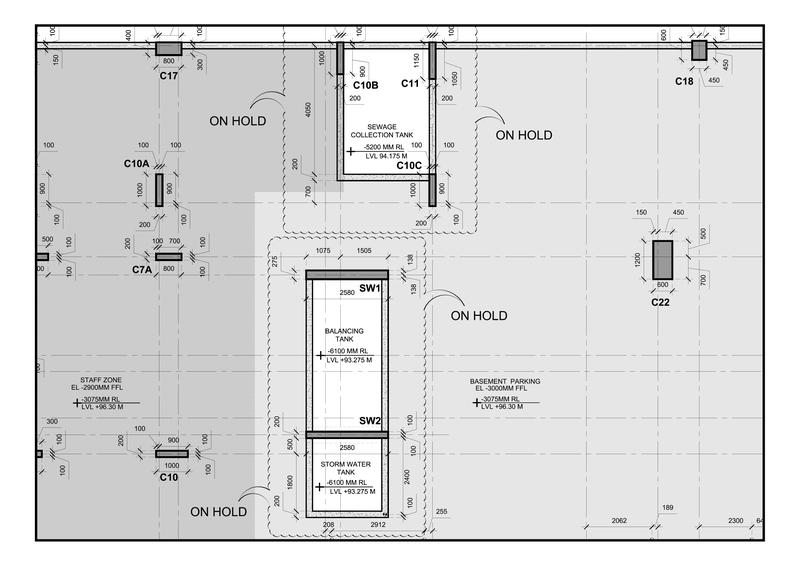

Image saved as file_1.jpeg


In [4]:
# Display image from PDF
process_and_display_image("file_1.pdf",save_path='file_1.jpeg')

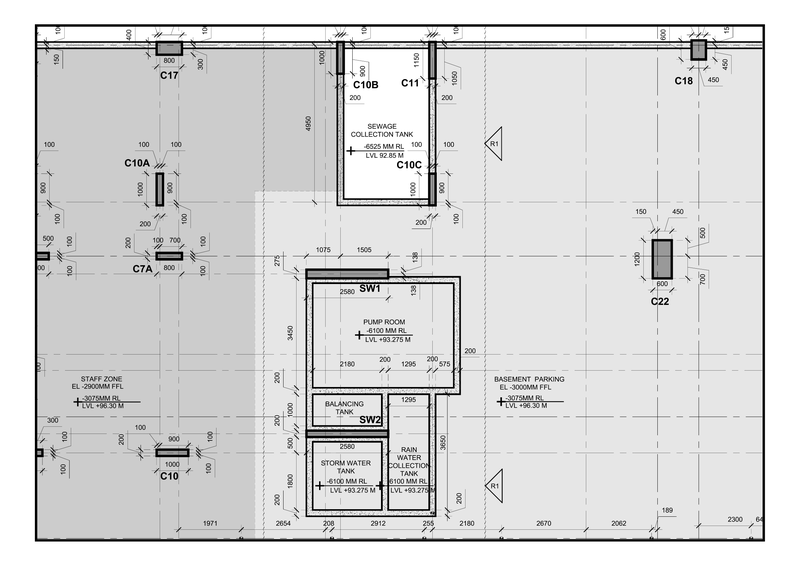

Image saved as file_2.jpeg


In [5]:
process_and_display_image("file_2.pdf",save_path='file_2.jpeg')

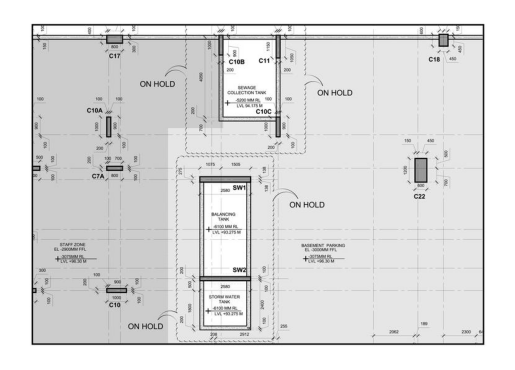

In [6]:
import matplotlib.pyplot as plt
# Read the image
image1 = cv2.imread('file_1.jpeg', cv2.IMREAD_UNCHANGED)

# Convert the image from BGR to RGB 
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image1)
plt.axis('off') # Hide the axes
plt.show()

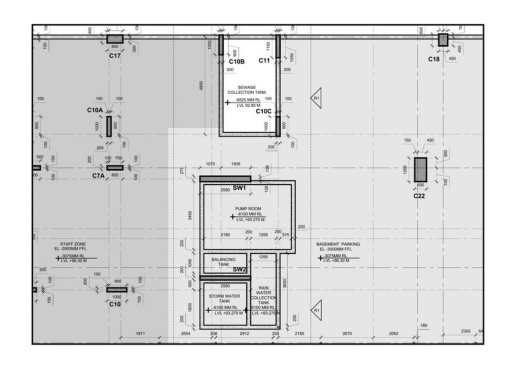

In [7]:
image2 = cv2.imread('file_2.jpeg', cv2.IMREAD_UNCHANGED)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.axis('off')
plt.show()

In [8]:
image1.shape , image2.shape

((566, 800, 3), (566, 800, 3))

In [9]:
image1.min() , image1.max()

(0, 255)

In [10]:
image1 / 255

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

<Axes: title={'center': 'Distribution of frequency'}, ylabel='Frequency'>

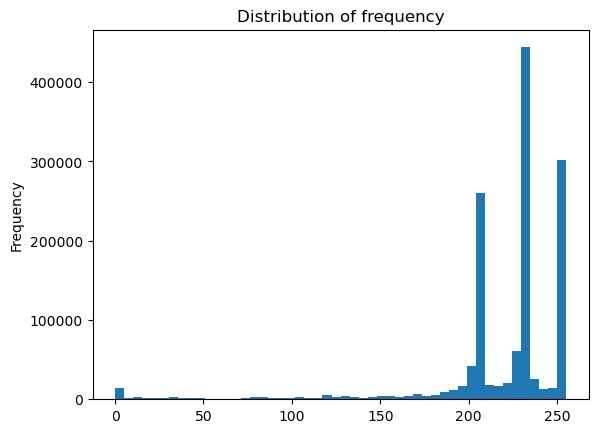

In [11]:
import pandas as pd
pd.Series(image1.flatten()).plot(kind='hist',bins=50,title='Distribution of frequency')

<Axes: title={'center': 'Distribution of frequency'}, ylabel='Frequency'>

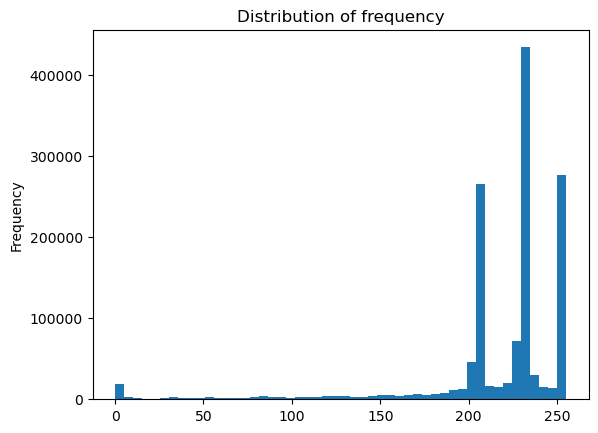

In [12]:
import pandas as pd
pd.Series(image2.flatten()).plot(kind='hist',bins=50,title='Distribution of frequency') 

In [13]:
# Difference between image
if image1.shape == image2.shape:
    difference = cv2.absdiff(image1,image2)

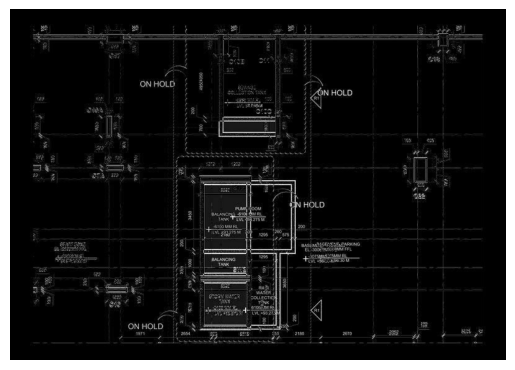

In [14]:
plt.imshow(difference)
plt.axis('off')
plt.show()

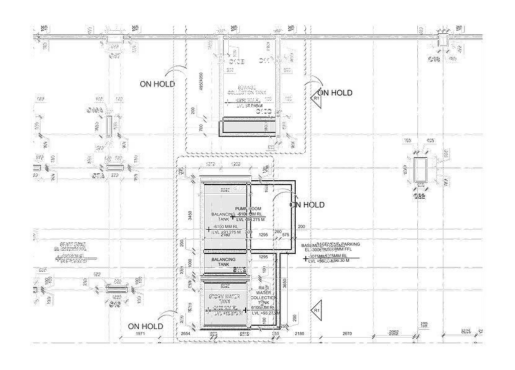

In [15]:
difference = 255 - difference
difference = cv2.normalize(difference, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
difference = np.uint8(difference)
plt.imshow(difference)
plt.axis('off')
plt.show()

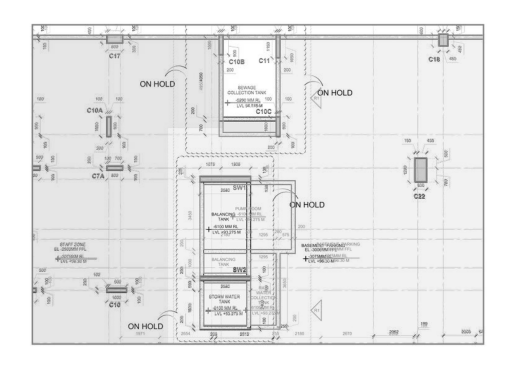

In [16]:
# Overlay the difference image on image1
overlay = cv2.addWeighted(image1, 0.5, difference, 0.5, 0)
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

# Display the overlay image
plt.imshow(overlay)
plt.axis('off')
plt.show()

In [17]:
# Specify the file path and name for the output image
output_file_path = 'final.jpeg'

# Save the 'overlay' image as a JPEG file
cv2.imwrite(output_file_path, cv2.cvtColor(overlay, cv2.COLOR_RGB2BGR))


True